In [1]:
%%bash
pip install pandas-datareader

In [2]:
pip show scikit-learn # to see which version and where scikit-learn is installed

Name: scikit-learn
Version: 0.23.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/augustguo/opt/anaconda3/lib/python3.7/site-packages
Requires: numpy, joblib, threadpoolctl, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/augustguo/opt/anaconda3/lib/python3.7/site-packages (0.23.1)
Note: you may need to restart the kernel to use updated packages.


In [6]:
!conda install -c conda-forge keras --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/augustguo/opt/anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.9.0              |   py37hc8dfbb8_1         162 KB  conda-forge
    astor-0.7.1                |             py_0          22 KB  conda-forge
    c-ares-1.15.0              |    h01d97ff_1001          81 KB  conda-forge
    cctools-895                |                1         1.9 MB  conda-forge
    certifi-2019.9.11      

In [17]:
import math
import pandas_datareader.data as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
# Define the instruments to download. We would like to see Apple, Microsoft.
company_list = ['AAPL']

start_date = '2012-01-01'
end_date = '2019-12-17'

df = web.DataReader('AAPL', 'yahoo', start_date, end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


In [37]:
#get the numbers of rows and columns in the dataframe
df.shape

(2003, 6)

/Users/augustguo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


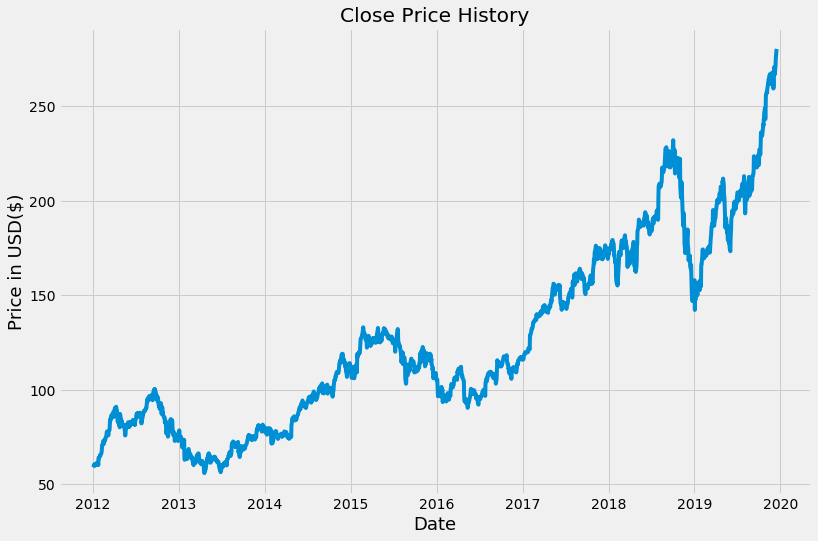

In [38]:
#visualize the closing price history 
plt.figure(figsize=(12, 8))
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in USD($)', fontsize=18)
plt.plot(df['Close'])

In [84]:
#create a new dataframe with only the close column 

data = df.filter(['Close'])
data

# df.loc[:, ['Close']] will do the same

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-11,270.769989
2019-12-12,271.459991
2019-12-13,275.149994


In [90]:
#convert the dataframe to numpy array
dataset = data.values
dataset

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [275.1499939 ],
       [279.85998535],
       [280.41000366]])

In [52]:
# get the number of columns to train the model on

training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1603

In [54]:
#scale the data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [56]:
# create training dataset

train_data = scaled_data[0:training_data_len, 0]

In [61]:
# split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
    
    #get a look what x_train and y_train look like
    if i <=61:
        print(x_train)
        print(y_train)
        print('')

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [62]:
# convert x_train and y_train into numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [64]:
x_train.shape

(1543, 60)

In [66]:
# reshape the data to be 3 dimensional for LSTM training as LST expect the shape as (sample#, times_step, #features)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [67]:
# built LSTM model 

model = Sequential()

# add first neural network layer with 50 neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))

# add second neural network layer with 50 neurons 
model.add(LSTM(50, return_sequences=False))

# add a dense layer with 25 neurons 
model.add(Dense(25))

# add last dense layer with 1 neuron
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [68]:
# compile the model 
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [69]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1543/1543 [==============================] - 129s 84ms/step - loss: 7.3242e-04


In [70]:
# create testing data set
# Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60:, :]

In [76]:
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [77]:
# convert the data into numpy array for LSTM model

x_test = np.array(x_test)

In [79]:
# reshape the array for LSTM model

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get the model predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [80]:
# get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

6.759934692382813

In [86]:
# plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

valid

/Users/augustguo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Predictions
Date,,
2018-05-17,186.990005,196.191025
2018-05-18,186.309998,195.983704
2018-05-21,187.630005,195.523270
2018-05-22,187.160004,195.168991
2018-05-23,188.360001,194.849304
...,...,...
2019-12-11,270.769989,270.959503
2019-12-12,271.459991,272.041260
2019-12-13,275.149994,273.162292


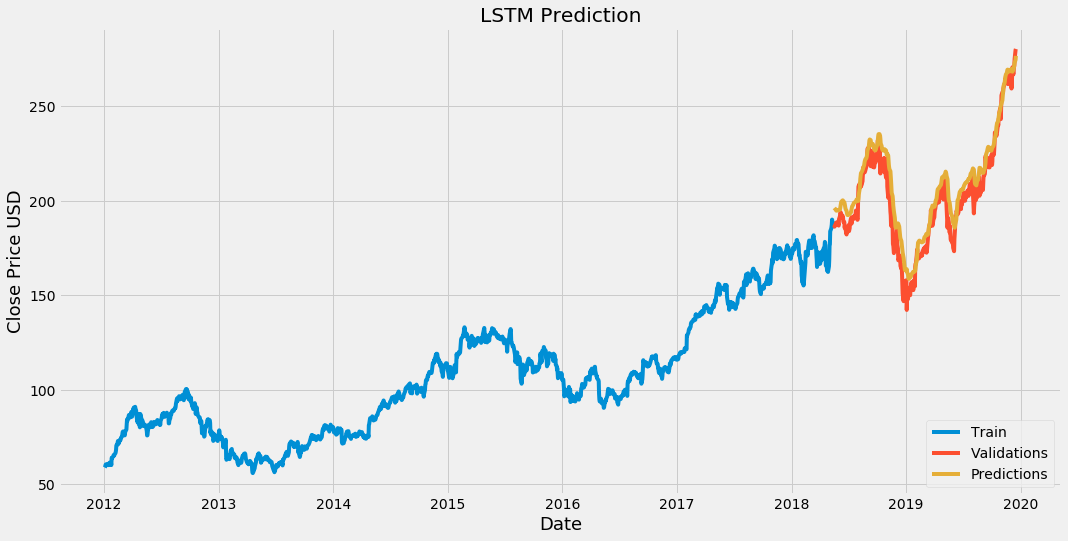

In [89]:
# visualize the data 
plt.figure(figsize=(16, 8))
plt.title('LSTM Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validations', 'Predictions'], loc='lower right')